In [21]:
import numpy as np 
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt 
import math
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#load data
def data_load():
    for i in range(19):
        df = pd.read_csv('dataset/dataset_' + str(i + 1) + '.txt', sep=',', header=None)
        print('The dataset'+str(i+1)+ ' contains %d rows.' % len(df)) 
        
   
    
#visulize dataset_2
def data_visulization():
   
    df = pd.read_csv('dataset/dataset_2.txt', sep=',', header=None)# read dataset file2
    df_sitting = df[df[24] == 1].values
    plt.plot(df_sitting[500:1500, 0:3])
    plt.show()

#remove noise
def noise_removing():
    df = pd.read_csv('dataset/dataset_3.txt', sep=',', header=None)
    b, a = signal.butter(4, 0.04, 'low', analog=False) # Butterworth low-pass filter.
    df_sitting = df[df[24] == 1].values
    for i in range(3):
        df_sitting[:,i] = signal.lfilter(b, a, df_sitting[:, i])
    plt.plot(df_sitting[500:1500, 0:3])
    plt.show()


def feature_engineering():
    training = np.empty(shape=(0, 10))
    testing = np.empty(shape=(0, 10))
    # deal with each dataset file
    for i in range(19):
        df = pd.read_csv('dataset/dataset_' + str(i + 1) + '.txt', sep=',', header=None)
        print('deal with dataset ' + str(i + 1))
        for c in range(1, 14):
            activity_data = df[df[24] == c].values
            # remove noise
            b, a = signal.butter(4, 0.04, 'low', analog=False)
            for j in range(24):
                activity_data[:, j] = signal.lfilter(b, a, activity_data[:, j])
            
            datat_len = len(activity_data)
            training_len = math.floor(datat_len * 0.8)
            training_data = activity_data[:training_len, :]
            testing_data = activity_data[training_len:, :]
            training_sample_number = training_len // 1000 + 1
            testing_sample_number = (datat_len - training_len) // 1000 + 1
            
            for s in range(training_sample_number):
                if s < training_sample_number - 1:
                    sample_data = training_data[1000*s:1000*(s + 1), :]
                else:
                    sample_data = training_data[1000*s:, :]
            

                feature_sample = []
                for i in range(3):
                    feature_sample.append(np.min(sample_data[:, i]))
                    feature_sample.append(np.max(sample_data[:, i]))
                    feature_sample.append(np.mean(sample_data[:, i]))
                feature_sample.append(sample_data[0, -1])
                feature_sample = np.array([feature_sample])
                training = np.concatenate((training, feature_sample), axis=0)
            
            for s in range(testing_sample_number):
                if s < training_sample_number - 1:
                    sample_data = testing_data[1000*s:1000*(s + 1), :]
                else:
                    sample_data = testing_data[1000*s:, :]

                feature_sample = []
                for i in range(3):
                    feature_sample.append(np.min(sample_data[:, i]))
                    feature_sample.append(np.max(sample_data[:, i]))
                    feature_sample.append(np.mean(sample_data[:, i]))
                feature_sample.append(sample_data[0, -1])
                feature_sample = np.array([feature_sample])
                testing = np.concatenate((testing, feature_sample), axis=0)

    df_training = pd.DataFrame(training)
    df_testing = pd.DataFrame(testing)
    df_training.to_csv('training_data.csv', index=None, header=None)
    df_testing.to_csv('testing_data.csv', index=None, header=None)

def model_training_and_evaluation():# build machine learning models to recognize human activities
    df_training = pd.read_csv('training_data.csv', header=None)
    df_testing = pd.read_csv('testing_data.csv', header=None)

    y_train = df_training[9].values
    # Labels should start from 0 in sklearn
    y_train = y_train - 1
    df_training = df_training.drop([9], axis=1)
    X_train = df_training.values
    
    y_test = df_testing[9].values
    y_test = y_test - 1
    df_testing = df_testing.drop([9], axis=1)
    X_test = df_testing.values
    #Feature normalization 
   
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Build KNN classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    # Evaluation. 
    y_pred = knn.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    # use confusion matrix to view the classification for each activity.
    print(confusion_matrix(y_test, y_pred))
    

    # Another machine learning model: svm. 
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-1,1e-2, 1e-3, 1e-4],
                     'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 100]},
                    {'kernel': ['linear'], 'C': [1e-3, 1e-2, 1e-1, 1, 10, 100]}]
    acc_scorer = make_scorer(accuracy_score)
    grid_obj  = GridSearchCV(SVC(), tuned_parameters, cv=10, scoring=acc_scorer)
    grid_obj  = grid_obj .fit(X_train, y_train)
    clf = grid_obj.best_estimator_
    print('best clf:', clf)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

The dataset1 contains 245576 rows.
The dataset2 contains 301901 rows.
The dataset3 contains 245985 rows.
The dataset4 contains 248239 rows.
The dataset5 contains 254178 rows.
The dataset6 contains 224073 rows.
The dataset7 contains 261959 rows.
The dataset8 contains 231653 rows.
The dataset9 contains 248855 rows.
The dataset10 contains 242709 rows.
The dataset11 contains 240251 rows.
The dataset12 contains 254794 rows.
The dataset13 contains 246190 rows.
The dataset14 contains 244144 rows.
The dataset15 contains 241272 rows.
The dataset16 contains 255201 rows.
The dataset17 contains 239838 rows.
The dataset18 contains 229396 rows.
The dataset19 contains 230628 rows.


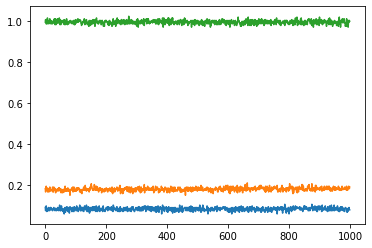

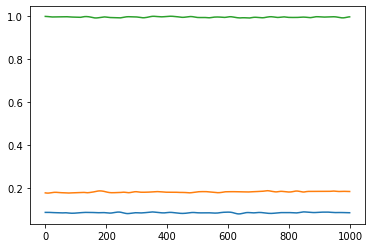

deal with dataset 1
deal with dataset 2
deal with dataset 3
deal with dataset 4
deal with dataset 5
deal with dataset 6
deal with dataset 7
deal with dataset 8
deal with dataset 9
deal with dataset 10
deal with dataset 11
deal with dataset 12
deal with dataset 13
deal with dataset 14
deal with dataset 15
deal with dataset 16
deal with dataset 17
deal with dataset 18
deal with dataset 19
Accuracy:  0.7504798464491362
[[ 43   3   0   0   0   1   0   0   0   0   7   3   0]
 [  3  54   0   0   0   0   0   0   0   0   0   0   0]
 [  0   3  48   1   2   0   1   0   0   0   1   1   0]
 [  2   0   2  84   4   5   1   1   0   0   0   0   0]
 [  0   0   1   8  36   7   1   3   0   0   1   0   0]
 [  1   1   2  14  26  32   4   1   1   0   1   2   0]
 [  1   0   6   4   2   6 191   4   5   0   0   0   0]
 [  0   0   1   0   0   2  14  21   1   0   0   0   0]
 [  0   0   0   1   0   1   9   2  24   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0  96   0   0   0]
 [  0   0   1   3   2   7   2 

In [21]:
if __name__ == '__main__':
    data_load()
    data_visulization()
    noise_removing()
    feature_engineering()
    model_training_and_evaluation()